## *Prologue *

## Python for Portfolio Optimization: The Ascent!

_First lessons to ascend the hilly terrain of Portfolio Optimization in seven strides (Lessons), beginning with the fundamentals (Lesson 1) and climbing slope after slope (Lessons 2-6), to reach the first peak of constrained portfolio optimization models (Lesson 7), amongst a range of peaks waiting beyond!_


## Lesson 1



# Fundamentals of Risk and Return of a Portfolio

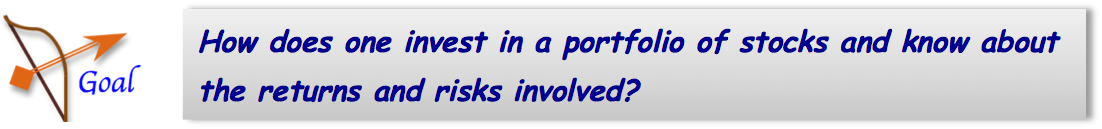

In [1]:
from IPython.display import Image
Image("/kaggle/input/fundamentals-of-risk-and-return-of-a-portfolio/Lesson1GoalHeaderImage.png")


## 1.1  Introduction

A **portfolio** is a basket of tradable assets such as stocks, bonds, commodities etc., which are held by an investor or investors. 
To keep matters simple  and straight, let us consider an investor who is interested in investing in Dow stocks. Dow or Dow30  or Dow Jones Industrial Average (DJIA) is a stock market index that shows how a selective set of 30 large and publicly owned companies in the United States, have traded over a period of time. The investor is interested in the following Dow30 stocks, 29 in number and whose **ticker** symbols have been shown in parantheses:

3M (MMM), American Express (AXP), Apple (AAPL), Boeing (BA), Caterpillar (CAT), Chevron (CVX), Cisco (CSCO), Coca-Cola (KO), Exxon Mobil (XOM), Goldman Sachs (GS), Home Depot (HD), IBM (IBM), Intel (INTC), Johnson & Johnson (JNJ), JPMorgan Chase (JPM), McDonald's (MCD), Merck (MRK), Microsoft (MSFT), Nike (NKE), Pfizer (PFE), Procter & Gamble (PG), Travelers Companies Inc. (TRV), United Health (UNH), United Technologies (UTX), Verizon (VZ), Visa (V), Walmart (WMT), Walgreens Boots Alliance (WBA) and Walt Disney (DIS).

The daily historical prices of a few Dow30 stocks for the period April 01, 2019 to April 10, 2019 have been shown in Fig. 1.1, which is a snapshot of the CSV file,  holding the historical dataset.  The historical prices of all stocks traded in any global stock exchange  can be downloaded for free from some  financial websites  or subscribed for,  from stock exchanges or other websites. 


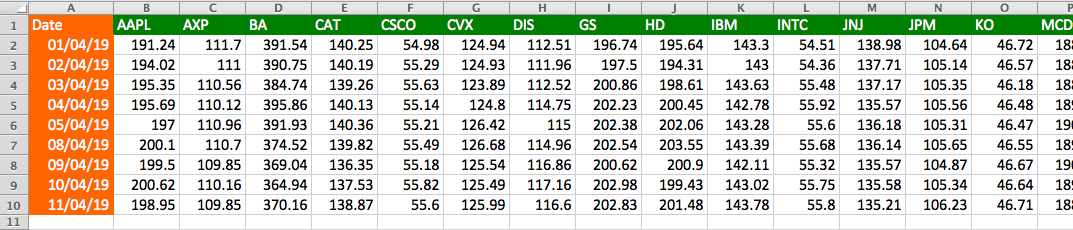

In [2]:
from IPython.display import Image
Image("/kaggle/input/fundamentals-of-risk-and-return-of-a-portfolio/Lesson1Fig1_1.png")


<h4 align="center">Fig. 1.1 Historical prices (daily) of a few Dow30 stocks - a snapshot</h4>

## 1.2  Rate of Return

Let us suppose the investor purchased a stock for a price $P_0$ at time $T_0$ and sold it at time $T_1$ for a price $P_1$. The time period between $T_0$  and $T_1$ is called as the **holding period** and the **rate of return** or the **holding period return** denoted by $R_T$ in the absence of any cash flows such as dividends etc., and expressed as a percentage is given by


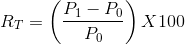

In [3]:
from IPython.display import Image
Image("/kaggle/input/fundamentals-of-risk-and-return-of-a-portfolio/Lesson1Eqn1_1.png")

<h5 align="right">...........................................(1.1)</h5>

For example,  the rate of return of AAPL stock assuming that it was bought on April 02, 2019 and sold on April 03, 2019 is, $ \left(\frac{195.35-194.02}{194.02}\right)X 100 = 0.69\%$. In other words, the daily return of AAPL is 0.69% for the day concerned.  
  
The holding period could be any calendar time such as days, weeks, months etc.   
  
The daily returns of all the Dow stocks listed in Section 1.1 can be computed using a Python code shown in the cell below.The code assumes that a CSV file with all the historical prices of the stocks, a snapshot of which was illustrated in Fig. 1.1 is available. The historical dataset considered for the Dow stocks is DJIA Index: April 11, 2014 to April 11, 2019. The CSV file comprises 1259 rows of data excluding the header and 29 columns excluding the date. The output of the Python code  is the daily returns(%) of the stocks. 

In [4]:
#Python code to compute the daily returns in percentage, of Dow Stocks listed in Sec.1.1
#calls function StockReturnsComputing to compute asset returns

#dependencies
import numpy as np
import pandas as pd

#input stock prices dataset
stockFileName = '/kaggle/input/fundamentals-of-risk-and-return-of-a-portfolio/DJIA_Apr112014_Apr112019.csv'
rows = 1259  #excluding header
columns = 29  #excluding date

#read stock prices 
df = pd.read_csv(stockFileName,  nrows= rows)

#extract asset labels
assetLabels = df.columns[1:columns+1].tolist()
print(assetLabels)

#extract asset prices data
stockPrice = df.iloc[0:, 1:]
print(stockPrice.shape)

#print stock price
print(stockPrice)


['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WBA', 'WMT', 'XOM']
(1259, 29)
            AAPL         AXP          BA         CAT       CSCO         CVX  \
0      74.230003   84.540001  122.070000  101.449997  22.459999  117.029999   
1      74.525711   85.500000  123.250000  102.779999  22.850000  118.699997   
2      73.994286   86.040001  124.269997  102.500000  22.889999  120.300003   
3      74.144287   87.400002  126.040001  102.930000  23.030001  121.830002   
4      74.991432   86.220001  127.919998  102.830002  23.209999  123.680000   
...          ...         ...         ...         ...        ...         ...   
1254  197.000000  110.959999  391.929993  140.360001  55.209999  126.419998   
1255  200.100006  110.699997  374.519989  139.820007  55.490002  126.680000   
1256  199.500000  109.849998  369.040009  136.350006  55.180000  125.540001   

The Python function **StockReturnsComputing (StockPrice, Rows, Columns)** computes the daily returns of stocks, given the daily stock prices **StockPrice** and its size (**Rows, Columns**).

In [5]:
#function to compute asset returns 
def StockReturnsComputing(StockPrice, Rows, Columns):
    
    import numpy as np
    
    StockReturn = np.zeros([Rows-1, Columns])
    for j in range(Columns):        # j: Assets
        for i in range(Rows-1):     # i: Daily Prices
            StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])* 100

    return StockReturn

The Python code fragment shown in the cell below,  computes the daily returns of the Dow stocks selected by the investor.

In [6]:
#compute daily returns in percentage of the Dow stocks

import numpy as np

stockPriceArray = np.asarray(stockPrice)
[Rows, Cols]=stockPriceArray.shape
stockReturns = StockReturnsComputing(stockPriceArray, Rows, Cols)
print('Daily returns of selective Dow 30 stocks\n', stockReturns)


Daily returns of selective Dow 30 stocks
 [[ 0.39836722  1.13555594  0.96665847 ...  2.19420472  1.15032288
   1.17866004]
 [-0.71307606  0.63158012  0.82758377 ...  0.51774632 -0.64616182
   0.83793071]
 [ 0.20271971  1.5806613   1.42432127 ...  0.22724132  0.44225288
   1.27685651]
 ...
 [-0.29985306 -0.76784013 -1.46320094 ... -1.01707408 -0.54419126
  -1.28915663]
 [ 0.561401    0.28220847 -1.11099255 ...  0.01834495  0.92207517
  -0.45160747]
 [-0.83241852 -0.2814143   1.43037266 ... -1.96294082  1.20482432
   0.47817436]]


## 1.3   Return on Market Index

A **Market Index**  serves to give a fair idea about how the overall  market data or specific segments of the market perform. DJIA index is one of several indices that exist in global markets and attempts to describe market conditions with the help of the 30 companies listed under it.  
  
Market index data comprises the following details, viz., **Open**, **High**, **Low**, **Close**, **Adjusted Close** and **Volume**, indicating the opening, high, low, closing and  adjusted close of the prices and the volume of trade undertaken for the period, respectively. Of these,  the closing price of the market index is considered to be  important.  
 
A snapshot of the DJIA Index for the period between April 01, 2019 to April 10, 2019 is shown in Fig. 1.2.

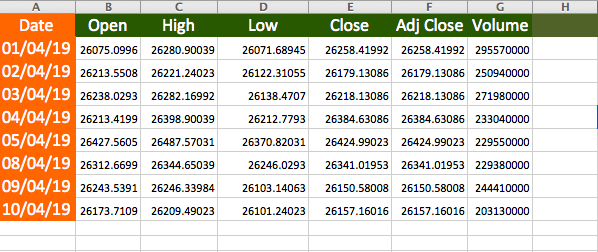

In [7]:
from IPython.display import Image
Image("/kaggle/input/fundamentals-of-risk-and-return-of-a-portfolio/Lesson1Fig1_2.png")

<h4 align="centre">Fig. 1.2 Market index of DJIA during April 01, 2019 to April 10, 2019 - a snapshot</h4>

The **return on market index** is computed in a way similar to the rate of return of a stock explained by equation (1.1). Thus the daily return of market index is obtained by subtracting the closing price at time T with that at time (T-1) and dividing the difference by the closing price at time (T-1), before expressing it as a percentage. The Adjusted Closing price can also be considered for the computation,  in lieu of Closing price.  
The DJIA market index percentage returns for the period April 02, 2019 to April 10, 2019 can be computed as, (-0.30, 0.15 0.64 0.15 -0.32 -0.72 0.03).


Market indices are useful to investors since it helps  investors to measure the performance of their portfolios against that of the markets. Thus if the daily market index return was 0.15 and that of the portfolio which the investor holds was 0.19 then there is a reason to rejoice,  since the investor was able to beat the market!

## 1.4  Mean and Covariance of Returns 

The mean and covariance of returns play a dominant role in determining the return and risk of a portfolio. The mean returns are denoted by $(\mu_1, \mu_2, ...\mu_N)$ for the N stocks comprising the portfolio. The covariance of returns is a symmetric matrix referred to as the **variance-covariance matrix of returns**  and is denoted by $\left(\sigma_{i,j}\right)$. The diagonal of the matrix $\left(\sigma_{i,i}\right)$ denotes the variance of returns.  The Python code fragment demonstrating the computatation of the mean and covariance of returns is  shown below: 

In [8]:
#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(stockReturns, axis = 0)
print('Mean returns of Dow Stocks:\n',  meanReturns)
covReturns = np.cov(stockReturns, rowvar=False)
print('Variance-covariance matrix of returns of Dow Stocks:\n')
print(covReturns)

Mean returns of Dow Stocks:
 [ 0.09027598  0.02910022  0.09966449  0.0386567   0.0809993   0.01551509
  0.03975381  0.03313877  0.08479014 -0.01611022  0.07274221  0.03154811
  0.06041058  0.01915697  0.05653419  0.04422144  0.03579986  0.09974359
  0.08008644  0.03375828  0.02514231  0.04254659  0.09548076  0.01871582
  0.10128134  0.02314321 -0.00168528  0.02946248 -0.0061016 ]
Variance-covariance matrix of returns of Dow Stocks:

[[2.37512857 0.67159954 0.96196299 1.04226142 0.99890235 0.66413311
  0.68002487 0.9540385  0.72630968 0.70945859 1.07333017 0.48572094
  0.8251006  0.30601011 0.45823283 0.73218    0.53433977 1.22660419
  0.77524223 0.5444771  0.41917661 0.50943202 0.77433417 0.69274799
  1.0086701  0.29354661 0.69735896 0.44587945 0.63272823]
 [0.67159954 1.64817768 0.80008198 0.9502813  0.70010508 0.63080612
  0.56872139 1.06463549 0.65826615 0.66251941 0.73789772 0.47196466
  1.00101545 0.30743029 0.35037656 0.65268493 0.55568077 0.7945144
  0.68112631 0.54156063 0.3447

## 1.5 Beta 

It is a fact that stocks which deliver high returns are prone to high risk. **Beta** $(\beta)$  or **Beta coefficient**, also referred to as **financial elasticity** helps to determine the asset risk with regard to that of the markets. Beta measures the volatility or systematic risk of an investment and is computed as, 

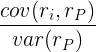

In [9]:
from IPython.display import Image
Image("/kaggle/input/fundamentals-of-risk-and-return-of-a-portfolio/Lesson1Eqn1_2.png")

<h5 align="right">..............................................(1.2)</h5>

where $cov(r_i, r_P)$ is the covariance of the rate of return $r_i$  of the asset $i$ in a portfolio P and $r_P$,  the rate of return of the portfolio P. $var(r_P)$ is the variance of the rate of return $r_P$ of the portfolio P. In practice, the portfolio return $r_P$ is replaced by the market index return that was explained in Sec. 1.3.

The interpretation of  $\beta$ is as follows:
$\beta=0$ implies that the stock return is uncorrelated with the market movements,
$\beta <0$ implies that the stock return inversely follows the market movements, and
$\beta >0$ implies that the stock return follows the market movements.  
For the last case, if $\beta <1$, then the stock is less volatile than the market, if $\beta>1$, then the stock is more volatile than the market and if $\beta =1$, then the stock is as volatile as the market. 

Let us suppose an investor decides to hold a **portfolio P** of the following 15 Dow stocks:
'AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'DIS', 'GS', 'HD', 'IBM', 'JPM', 'KO', 'MCD', 'MRK', 'UNH', 'WBA'. The investor wishes to investigate the volatilities of the assets and therefore computes the individual asset betas over a 3-Year market data ( April 2016 -April 2019). The Python code to compute asset betas is shown below:

In [10]:
#compute betas of Dow stocks over a 3-year historical period,
#DJIA Index- April 2016 to April 2019

#dependencies
import numpy as np
import pandas as pd

#input stock prices and market datasets
stockFileName = '/kaggle/input/fundamentals-of-risk-and-return-of-a-portfolio/DJIAkpf1Apr2016to20193YBeta.csv'
marketFileName = '/kaggle/input/fundamentals-of-risk-and-return-of-a-portfolio/DJIAMarketDataApr2016to20193YBeta.csv'
stockRows = 756  #excluding header 
stockColumns = 15  #excluding date
marketRows = 756
marketColumns = 7

#read stock prices dataset and market dataset 
dfStock = pd.read_csv(stockFileName,  nrows= stockRows)
dfMarket = pd.read_csv(marketFileName, nrows = marketRows)

#extract asset labels of stocks in the portfolio
assetLabels = dfStock.columns[1:stockColumns+1].tolist()
print('Portfolio stocks\n', assetLabels)

#extract asset prices data and market data
stockData = dfStock.iloc[0:, 1:]
marketData = dfMarket.iloc[0:, [4]] #closing price 

#compute asset returns
arrayStockData = np.asarray(stockData)
[sRows, sCols]=arrayStockData.shape
stockReturns = StockReturnsComputing(arrayStockData, sRows, sCols)

#compute market returns
arrayMarketData = np.asarray(marketData)
[mRows, mCols]=arrayMarketData.shape
marketReturns = StockReturnsComputing(arrayMarketData, mRows, mCols)

#compute betas of assets in the portfolio
beta= []
Var = np.var(marketReturns, ddof =1)
for i in range(stockColumns):
    CovarMat = np.cov(marketReturns[:,0], stockReturns[:, i ])
    Covar  = CovarMat[1,0]
    beta.append(Covar/Var)
    
    
#output betas of assets in the portfolio
print('Asset Betas:  \n')
for data in beta:
    print('{:9.3f}'.format(data))


Portfolio stocks
 ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'DIS', 'GS', 'HD', 'IBM', 'JPM', 'KO', 'MCD', 'MRK', 'UNH', 'WBA']
Asset Betas:  

    1.134
    1.087
    1.392
    1.527
    1.154
    0.767
    1.317
    0.937
    0.976
    1.115
    0.460
    0.554
    0.735
    0.950
    0.850


A careful observation of the betas of the Dow stocks reveal that AAPL, AXP, BA, CAT, CSCO, GS and JPM, whose betas are greater than 1, are notionally more volatile than the market, while the rest of the stocks in the portfolio whose betas are less than 1 ( but > 0), are notionally less volatile than the market. A stock with beta equal to 1, moves with the market. Thus, IBM and UNH could be viewed as moving with the market. 

## 1.6   Portfolio weights and Portfolio Beta

The amount of capital invested in  assets comprising a portfolio,  by the investor is termed **weights**. Portfolio weights therefore indicate the proportion of investments made over the assets comprising the portfolio. Though portfolio weights are practically expressed as a percentage, it is convenient to express them as lying in the interval [0-1], where 0 weights indicate nil investment in the asset and 1 indicates full investment of capital in an asset. An interval (0,1], would mean that every asset in the portfolio must have some portion of the capital invested in it.  A portfolio whose weights sum up to 1, is called a *fully invested portfolio* and a portfolio whose weights are equally distributed   is called as *equal weighted portfolio*.  

With regard to portfolios with equity stocks, **portfolio beta** is the weighted sum of the asset betas,where the weights are represented by the portfolio weights. Portfolio beta is given by, $\sum{\beta_i.W_i}$, where $\beta_i$ are the asset betas and $W_i$ are the portfolio weights. 

## 1.7   Portfolio Return and Portfolio Risk

Harry Markowtiz [MAR 52] proposed a framework known as **Mean-Variance Analysis** which won him the 1990 Nobel Prize in Economics. The framework laid the foundation for what is known as **Modern Portfolio Theory**. It viewed **portfolio return** as the capital gain that can be expected by holding a portfolio and **portfolio risk** as the extent of capital losses that it can suffer possibly due to adverse market movements. Portfolio return and risk were modelled using the *mean* and *variance* of the portfolio's fluctuations respectively. 

Portfolio return is  defined as follows:
Let P be a portfolio comprising assets $A_1, A_2,...A_N$ with weights $W_1, W_2,...W_N$ and $r_1, r_2, ...r_N$ as the asset returns. The portfolio return *r*  determined by a weighted summation of its individual asset returns is given by, 

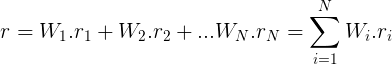

In [11]:
from IPython.display import Image
Image("/kaggle/input/fundamentals-of-risk-and-return-of-a-portfolio/Lesson1Eqn1_3.png")

<h5 align="right">................................................(1.3)</h5>

The **annualized portfolio return** assuming that the number of trading days in a year were $T_y$ ( for example, 261 out of 365 days in a year), is given by,

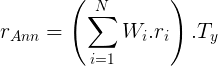

In [12]:
from IPython.display import Image
Image("/kaggle/input/fundamentals-of-risk-and-return-of-a-portfolio/Lesson1Eqn1_4.png")

<h5 align="right">...............................................(1.4)</h5>

Portfolio risk is the standard deviation of its returns and is given by,

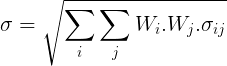

In [13]:
from IPython.display import Image
Image("/kaggle/input/fundamentals-of-risk-and-return-of-a-portfolio/Lesson1Eqn1_5.png")

<h5 align="right">.............................................(1.5)</h5>

where $\sigma_{ij}$ is the covariance of returns between assets i and j of the portfolio, also referred to as the variance-covariance matrix of returns. Standard deviation is a prominent measure of dispersion of data borrowed from Statistics and describes the deviation or spread of the data from its mean. In the case of portfolios, standard deviation of its returns, which is its risk, helps to measure the consistency of the returns. 
The **annualized portfolio risk** in percentage,  $\sigma_{Ann}$ is given by,

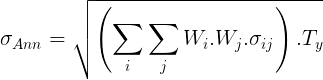

In [14]:
from IPython.display import Image
Image("/kaggle/input/fundamentals-of-risk-and-return-of-a-portfolio/Lesson1Eqn1_6.png")

<h5 align="right">..........................................(1.6)</h5>

where $T_y$ is the number of trading days in a year.

<h3 align="left">Risk-Return Tradeoff</h3>  

It is an established trading principle that investments giving high returns are always associated with a probability of high risks and those that are less risky are associated with a probability of low returns. A typical example is when an investor facing retirement from service,  chooses to invest her hard-earned retirement benefits  in bank deposits or government bonds which are risk free (and therefore yield low returns), rather than investing them in stock markets which despite their  potential to yield massive returns are bound by risks. Again, time plays a significant role while managing the risk - reward interplay of investments. For example,  a long term investment in high yielding stocks in the stock market or real estate, can help appreciation of the investor's capital, while offering the potential to recover from risks. The risk-return tradeoff therefore,  rests on many factors such as investor's risk appetite, holding period of securities and the potential to make up for losses. 

<h2 align="left">1.8  Case Study</h2>  

Let us consider the portfolio P of Dow stocks described in Sec. 1.5. Let us suppose that a moderately risk-averse investor having realized the volatility of stocks after computing the asset betas, decides to invest 40% of  the capital in stocks with high volatility ($\beta >1$) and 60% of the capital on other stocks which are less volatile or will move with the market ($\beta \le 1$). The portfolio weights reflecting the same are shown in the table. The red banded tickers indicate high volatility stocks, the green banded tickers indicate low volatility stocks and blue banded stocks indicate those that will move with the market.


Thus, if the investor owns a capital of USD 10,000, the investor decides to invest  USD 6000 on less risky  stocks and USD 4000 on risky stocks. The apportioning of the capital between  individual stocks are determined by the weights, which let us suppose the investor chose to do it according to her own whims and fancies! Thus,stocks  AAPL, AXP, BA, CAT, CSCO, GS and JPM, which are highly volatile are allotted  9%,  7%, 3%, 2%, 7%, 4% and 8% of the capital respectively,  that adds up to USD 4000. Stocks DIS, HD, IBM, KO, MCD, MRK, UNH and  WBA are allotted 6%,7%, 11%, 9%, 7%, 5%, 11% and 4% respectively,  that adds up to USD 6000. 

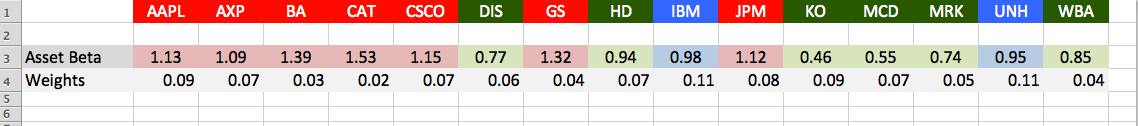

In [15]:
from IPython.display import Image
Image("/kaggle/input/fundamentals-of-risk-and-return-of-a-portfolio/Lesson1Fig1_3.png")


<h4 align="center">Fig. 1.3 Asset betas and portfolio weights of 15 Dow stocks held by an investor for Portfolio P</h4>  

  
The Python code fragment to compute the portfolio return and risk is given below. The portfolio weights and asset betas have been provided as direct inputs in the code to aid  brevity of presentation.

In [16]:
#portfolio risk, expected return and portfolio beta computation

#input weights and asset betas for portfolio P as described in Sec. 1.5
weights = np.array([0.09, 0.07, 0.03, 0.02, 0.07, 0.06, 0.04, 0.07, 0.11, \
                    0.08, 0.09, 0.07, 0.05, 0.11, 0.04])
assetBeta = np.array([1.13, 1.09, 1.39, 1.53, 1.15, 0.77, 1.32, 0.94, 0.98,\
                      1.12, 0.46, 0.55, 0.74, 0.95, 0.85])

#compute mean and covariance of asset returns of portfolio P available in stockReturns
meanReturns = np.mean(stockReturns, axis = 0)
covReturns = np.cov(stockReturns, rowvar=False)

#compute portfolio risk
portfolioRisk = np.matmul((np.matmul(weights,covReturns)), np.transpose(weights))

#compute annualized portfolio risk for trading days = 251
annualizedRisk  =   np.sqrt(portfolioRisk*251) 

#compute expected portfolio return
portfolioReturn = np.matmul(np.array(meanReturns),weights.T)

#compute annualized expected portfolio return
annualizedReturn = 251*np.array(portfolioReturn) 

#compute portfolio beta
portfolioBeta = np.matmul(assetBeta,weights.T)

#display results
print("\n Annualized Portfolio Risk: %4.2f" % annualizedRisk,"%")
print("\n Annualized Expected Portfolio Return: %4.2f" % annualizedReturn,"%")
print("\n Portfolio Beta:%4.2f" % portfolioBeta)



 Annualized Portfolio Risk: 12.54 %

 Annualized Expected Portfolio Return: 14.94 %

 Portfolio Beta:0.95


 <h3 align="left">Investment analysis of Portfolio P</h3>  

The risk-averse investor was playing moderately safe by investing only 40% of the capital in stocks with high volatility and 60% in stocks with less volatility. The portfolio yields an annual expected return of 14.94%. If one were to compare the returns with those of 10-year Treasury Bond (T-Bonds) issued by the US Government which are fixed interest debt securities that are risk-free (investors receive fixed interest payments until maturity date), the average annual return of T-Bonds for the period 2014 - 2018 was 3.1%, with a high of 10.75% during 2014. Again, comparing the returns of the portfolio with that of the Dow Jones Industrial Average market index, the average annual rate of return has been 5.42%.  Thus, in this specific case, portfolio P was able to beat the market!  

  
However, the annualized risk of 12.54% needs to be seriously looked at. As explained earlier,  the risk is a measure of the consistency of the return. If the investor's risk appetite can accommodate this, then all is well!  
Happy investing!

<h2 align="left">Companion Reading</h2>  

This blog  is an abridged adaptation of concepts discussed in Chapter 1 of [PAI 18] to Dow Jones dataset (DJIA index: April, 2014- April, 2019) and implemented in Python. Readers (read "worker bees"),  seeking more information may refer to the corresponding chapter in the  book.


<h2 align="left">References</h2>

[MAR 52]   Markowitz H., Portfolio Selection, *The Journal of Finance*, vol. 7, no. 1, 
           pp. 77-91, Mar., 1952.

[PAI 18]   Vijayalakshmi Pai G. A., Metaheuristics for Portfolio Optimization- *An 
           Introduction using MATLAB*, Wiley-ISTE, 2018. https://www.mathworks.com/academia/books/metaheuristics-for-portfolio-optimization-pai.html  
             
**GitHub Repository**  
PythonFinance-PortfolioOptimization
https://github.com/PaiViji  
  
  

## *NEXT.*..

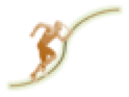

In [17]:
from IPython.display import Image
Image("/kaggle/input/fundamentals-of-risk-and-return-of-a-portfolio/Lesson1ExitTailImage.png")

**Lesson2:   Some glimpses of Financial Data Wrangling**   

_(Goal: Why is it essential to clean and transform raw financial data, before they are used to make investment decisions?)_   

 Kaggle Kernel: _Some glimpses of Financial Data Wrangling_


<style
  type="text/css">
h1 {color:red;}

p {color:blue;}
</style>

<style
  type="text/css">
h1 {color:red;}

p {color:blue;}
</style>